

# Project: Investigate a Dataset (Medical Appointment No Shows!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this data set, more than 100,000 medical appointments were collected for patients in Brazil, and it was found that nearly 30% of these patients miss their appointments! What are the reasons for that? And what are the characteristics of patients who miss their appointments?
<br>

> The questions for this project will be as follows:
*  Who's Misses His Appointments More: Males or Females?
*  Do Elderly Patients Seem to Miss their Appointments More?
*  Do Alcoholic Patients Seem to Miss their Appointments?
*  Does Sending SMS Messages Have an Effect on Patients Attending their Appointments?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('/Users/omaralamri/Desktop/Udacity/Data Analyst/Project 2/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> To make this dataset more clear, below I will put a brief explanation of each column:
1. **Patient Id:** Identification of a patient.
2. **Appointment ID:** Identification of each appointment
3. **Gender:** Male or Female
4. **ScheduledDay:** The day of the actuall appointment, when they have to visit the doctor.
5. **Appointment Day:** The day someone called or registered the appointment
6. **Age:** How old is the patient 
7. **Neighbourhood:** Where the appointment takes place
8. **Scholarship:** True of False
9. **Hipertension:** True of False
10. **Diabetes:** True of False
11. **Alcoholism:** True of False
12. **Handcap:** True of False
13. **SMS_received:** True of False
14. **No-show:** True of False. ‘False’ if the patient showed up to their appointment, and ‘True’ if they did not.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




### Data Cleaning

In [33]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Drop Values
> As we can see in the Describe Method Above, The Age Column has values less than 0 !! And of course, these values are considered incorrect, so I have to delete them.

In [34]:
df.drop(df[df["Age"] < 0].index, inplace=True)

### Drop Columns
> I will drop the columns that I don't need for my Analysis.

In [35]:
df.drop(['Scholarship', 'Hipertension', 'Diabetes', 'Handcap', 'ScheduledDay', 'Neighbourhood', 'AppointmentDay'], axis = 1, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,Age,Alcoholism,SMS_received,No-show
0,2.987250e+13,5642903,F,62,0,0,No
1,5.589978e+14,5642503,M,56,0,0,No
2,4.262962e+12,5642549,F,62,0,0,No
3,8.679512e+11,5642828,F,8,0,0,No
4,8.841186e+12,5642494,F,56,0,0,No


### Rename Columns
> I changed the name of a column to be more practical

In [36]:
df.rename(columns = {'No-show':'No_show'}, inplace = True) 

### Is there any Missing Values?

In [37]:
df.isnull().sum()

PatientId        0
AppointmentID    0
Gender           0
Age              0
Alcoholism       0
SMS_received     0
No_show          0
dtype: int64

### Is there any Duplicated Values?

In [38]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Who's Misses His Appointments More: Males or Females? )

#### First, Let's Count the Number of Appointments for each Gender

In [39]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

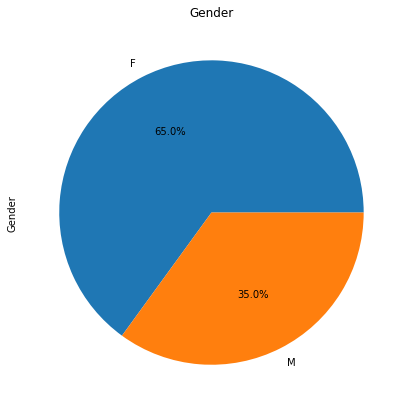

In [40]:
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%' ,figsize=(10,7))
plt.title('Gender')

> As we can see in the graph, 65% of the appointments are for females, and only 35% for males.

#### Second, Let's count The Number of Missed Appointments for each Gender

In [41]:
Femlae_Missed = len(df.query('No_show == "Yes" and Gender == "F"'))
Male_Missed = len(df.query('No_show == "Yes" and Gender == "M"'))

print('Number of Missed appointments By Female = {}'.format(Femlae_Missed))
print('Number of Missed appointments By Males = {}'.format(Male_Missed))


Number of Missed appointments By Female = 14594
Number of Missed appointments By Males = 7725


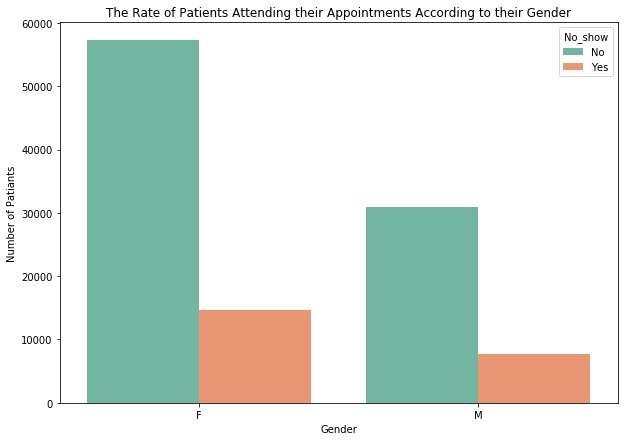

In [42]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df, palette = "Set2")
ax.set(xlabel='Gender', ylabel='Number of Patiants')
plt.title("The Rate of Patients Attending their Appointments According to their Gender");
plt.show()

> As we can see in the graph, it appears that females are more likely to miss their appointments than males. <br>
**Note**: This is most likely due to the fact that the number of female patients is much higher than males.

### Research Question 2  (Do Elderly Patients Seem to Miss their Appointments More?)

#### First, Let's Count the Number of Missed Appointments

In [43]:
Missed_Appointments = len(df.query('No_show == "Yes"'))
print('The Total Number of Missed Appointments is = {}'.format(Missed_Appointments)) 

The Total Number of Missed Appointments is = 22319


In [44]:
Attended_Appointments = len(df.query('No_show == "No"'))
print('The Total Number of Attended Appointments is = {}'.format(Attended_Appointments)) 

The Total Number of Attended Appointments is = 88207


#### Now, let's see all the missed appointments with the patient's age for each appointment
> I will use this variable 'Missed_Ages' in the next two cells

In [45]:
Missed_Ages = (df.query('No_show == "Yes"').Age)
Missed_Ages

6         23
7         39
11        29
17        40
20        30
          ..
110484    45
110492    33
110496    37
110515    33
110516    37
Name: Age, Length: 22319, dtype: int64

#### Average age of patients who missed their appointments

In [46]:
df.Age[Missed_Ages].mean()

36.832340158609256

#### Here, We will See a Graph That will illustrate More Which Age Groups of Patients Missed Their Appointments The Most

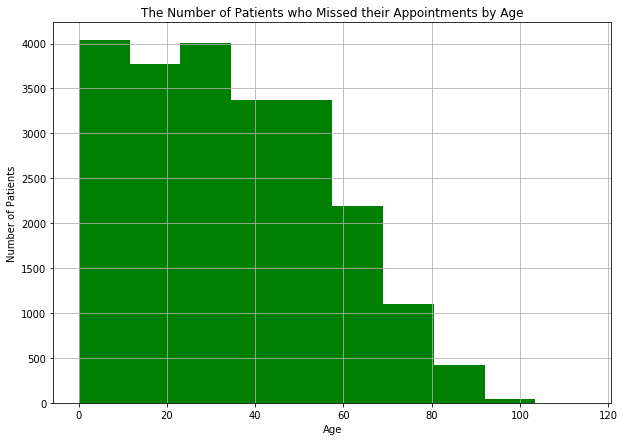

In [47]:
Missed_Ages.hist(facecolor='green', figsize=(10,7))
plt.title('The Number of Patients who Missed their Appointments by Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients');

> As we can see in the graph, younger patients are more likely to miss their appointments than those who are elderly, and this may be due to their less awareness of the seriousness of their diseases and the importance of seeing a doctor to maintain their health.

### Research Question 3 (Do Alcoholic Patients Seem to Miss their Appointments?) 

#### How many alcoholic patients have missed their appointments?

In [48]:
Alcoholic_Missed = (df.query('Alcoholism == 1 and No_show == "Yes"' ))
len(Alcoholic_Missed)

677

#### How many alcoholic patients showed up for their appointments?

In [49]:
Alcoholic_Appeared = (df.query('Alcoholism == 1 and No_show == "No"'))
len(Alcoholic_Appeared)

2683

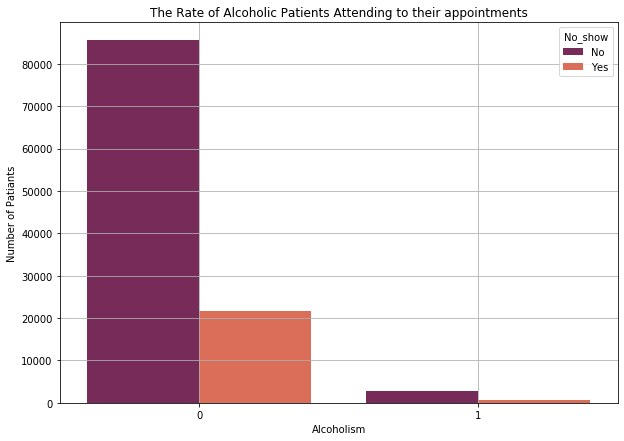

In [50]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df.Alcoholism, hue=df.No_show, data=df, palette = "rocket")
ax.set(xlabel='Alcoholism', ylabel='Number of Patiants')
plt.title("The Rate of Alcoholic Patients Attending to their appointments");
plt.grid(True)
plt.show()

> As we can see in the graph, it seems that alcoholic patients usually show up for their appointments unexpectedly!

### Research Question 4 (Does Sending SMS Messages Have an Effect on Patients Attending their Appointments?) 

#### First, let's see the total number of patients who have received and did not receive messages on their mobiles

In [51]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

#### How many patients have received messages on their mobiles and did not show up for their appointments?

In [52]:
Received_Message = (df.query('SMS_received == 1 and No_show == "Yes"' ))
len(Received_Message)

9784

#### How many patients have received messages on their mobiles and show up for their appointments?

In [53]:
No_Message = (df.query('SMS_received == 1 and No_show == "No"' ))
len(No_Message)

25698

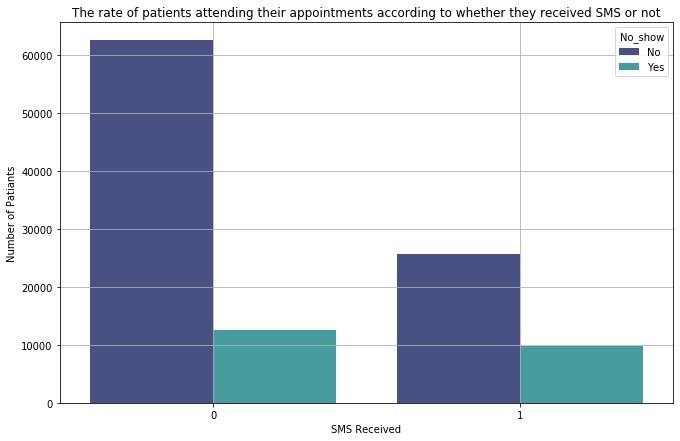

In [54]:
plt.figure(figsize=(11, 7))
ax = sns.countplot(x=df.SMS_received, hue=df.No_show, data=df, palette = "mako")
ax.set(xlabel='SMS Received', ylabel='Number of Patiants')
plt.title("The rate of patients attending their appointments according to whether they received SMS or not");
plt.grid(True)
plt.show()

> As we can see in the graph, sending messages to patients has an impact on their attendance for their appointments. More than half of the patients who received SMS messages showed up for their appointments.

> On the other hand, the number of patients who showed up for their appointments without receiving any SMS messages was much larger!

<a id='conclusions'></a>
## Conclusions

> In conclusion, after analyzing this data set, some unexpected results emerged, such as that alcoholic patients usually show up at their appointments! It also appears that older patients are more committed to attending their appointments than younger patients. And it turns out that sending SMS to patients has a positive effect on their attendance for their appointments! Finally, female patients are more likely to miss their appointments than males.


<a id='conclusions'></a>
## Limitations

> This data set would have been better if it had the type of disease for each appointment, as we would have come out with better and more accurate results and we would have known which disease most often had patients who missed their appointments.

> It would also be great if we knew the marital status of the patient, whether he was married or single, because this may have an impact on the patient's seriousness to come to his appointments, as it is likely that married patients will be more eager to attend their appointments than single patients.